In [1]:
import numpy as np
import os
import cv2
import moviepy.editor as mpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
background = cv2.imread("Malibu.jpg")
#cv2.imshow("Background Image Window", background)
#cv2.waitKey(0)

background_height = background.shape[0]
background_width = background.shape[1]

ratio = 360/background_height

background = cv2.resize(background,(int(background_width*ratio),360))

print(background.shape)


images_list = []


(360, 926, 3)


In [23]:

image = cv2.imread("cat/cat_"+str("5")+".png")
foreground = np.logical_or(image[:,:,1]<180,image[:,:,0]>150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat_values = image[nonzero_x,nonzero_y,:]
new_frame = background.copy()
new_frame[nonzero_x,nonzero_y,:] = nonzero_cat_values
new_frame = new_frame[:,:,[2,1,0]]



TypeError: 'module' object is not callable

In [8]:
A = np.array([2,3,5,8])
A[len(A)-1]


8

In [19]:
f = open("Plane_1.txt", "r")
s = f.read()
s = s.replace(")\n(",")(")
s = s.split(")(")
s[0] = s[0].replace("(","")
s[-1] = s[-1].replace(")","")
list_data = []
for i in s:
    list_data.append(i.split(" "))

list_array = np.array(list_data).astype(np.float64)


(1888, 3)

In [165]:
f = open("Plane_1.txt", "r")
s = f.read()
s = s.split("\n")
s = s[:-1]
s_array = []
for x in s:
    splited = x.split(")(")
    for i in range(0,len(splited)):
        splited[i] = splited[i].replace("(","")
        splited[i] = splited[i].replace(")","")
        splited[i] = np.array(splited[i].split(" ")).astype(np.float32)
        #print(splited[i].split(" "))
        #splited[i] = splited[i].split(" ")
    s_array.append(np.array(splited).astype(np.float32))

s_array = np.array(s_array).astype(np.float32)
s_array[0].T[0:2].T


array([[316.7763, 129.5932],
       [255.2238, 129.5932],
       [316.7763, 191.1457],
       [255.2238, 191.1457]], dtype=float32)

In [166]:
pts1 = s_array[0].T[0:2].T
pts1temp = pts1.copy()


pts1[0] = pts1temp[1]
pts1[3] = pts1temp[2]
pts1[1] = pts1temp[0]
pts1[2] = pts1temp[3]


[[255.2238 129.5932]
 [316.7763 129.5932]
 [255.2238 191.1457]
 [316.7763 191.1457]]
[[255.2238 129.5932]
 [316.7763 129.5932]
 [255.2238 191.1457]
 [316.7763 191.1457]]


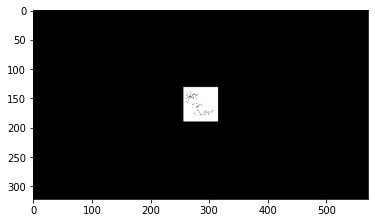

In [178]:
pts2 = np.float32([[0, 0], [256, 0], [0, 256], [256, 256]])
pts_m = np.float32([[255.2238, 129.5932], [316.7763, 129.5932], [255.2238 ,191.1457], [316.7763, 191.1457]])

matrix = cv2.getPerspectiveTransform(pts1.astype(np.float32), pts2.astype(np.float32))
matrix = np.linalg.inv(matrix)

album = cv2.imread("albums/album.png")
result = cv2.warpPerspective(album, matrix, (572, 322))
plt.imshow(result)

[[ 0.5  0.   0. ]
 [ 0.   0.5  0. ]
 [-0.  -0.   1. ]]


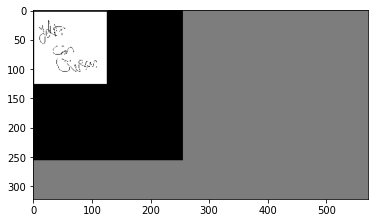

In [99]:
img = np.zeros([322,572,3],dtype=np.uint8)
img.fill(125) # or img[:] = 255
album = cv2.imread("albums/album.png")
new_frame = img.copy()

def image_adding(source,adder_image,x,y):
    new_frame = source.copy()
    source_x = source.shape[0]
    source_y = source.shape[1]
    adder_image_x = adder_image.shape[0]
    adder_image_y = adder_image.shape[1]
    for i in range(0,adder_image_x):
        for j in range(0,adder_image_y):
            new_frame[(i+x) % source_x,(j+y) % source_y,:] = adder_image[i,j,:]
    
    return new_frame



input_pts = np.float32([[0,0],[0,256],[256,0],[256,256]])
output_pts = np.float32((316.7763,129.5932,523.4999)(255.2238,129.5932,523.4999)(316.7763,191.1457,523.4999)(255.2238,191.1457,523.4999))

# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
print(M)
out = cv2.warpPerspective(album,M,(album.shape[0],album.shape[1]),flags=cv2.INTER_LINEAR)

plt.imshow(image_adding(img,out,0,0))


In [201]:
i = 1
background = np.zeros([322,572,3])
background.fill(255)
background_height = background.shape[0]
background_width = background.shape[1]

ratio = 360/background_height
background = cv2.resize(background,(int(background_width*ratio),360))
image = cv2.imread("cat/cat_"+str(i)+".png")
    
foreground = np.logical_or(image[:,:,1]<180,image[:,:,0]>150)
nonzero_x, nonzero_y = np.nonzero(foreground)
nonzero_cat_values = image[nonzero_x,nonzero_y,:]
new_frame = background.copy()

new_frame[nonzero_x,nonzero_y,:] = nonzero_cat_values
